# Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.optimizers import SGD

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.listdir('/content/drive/MyDrive')

In [3]:
df = pd.read_csv('/content/drive/MyDrive/datasets/diamonds.csv')

In [4]:
df.shape

(53940, 11)

## Data Exploration and Preprocessing

### Loading and Exploring the Dataset

In [5]:
def get_column_values(col):
    my_set = set()
    for value in df[col]:
        my_set.add(value)
    return my_set

print(get_column_values('cut'))
print(get_column_values('color'))
print(get_column_values('clarity'))


{'Fair', 'Very Good', 'Good', 'Premium', 'Ideal'}
{'D', 'J', 'H', 'G', 'E', 'F', 'I'}
{'IF', 'I1', 'VS2', 'VVS2', 'SI1', 'VS1', 'SI2', 'VVS1'}


In [6]:
# remove the first column which is just ID
df = df.drop(df.columns[0], axis=1)

In [7]:
print(df.head())
print(df.shape)
print(df.info())
print(df.describe())

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
(53940, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float

In [8]:
cols = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z', 'price']
categorical_columns = ['cut', 'color', 'clarity']
numerical_columns = ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']

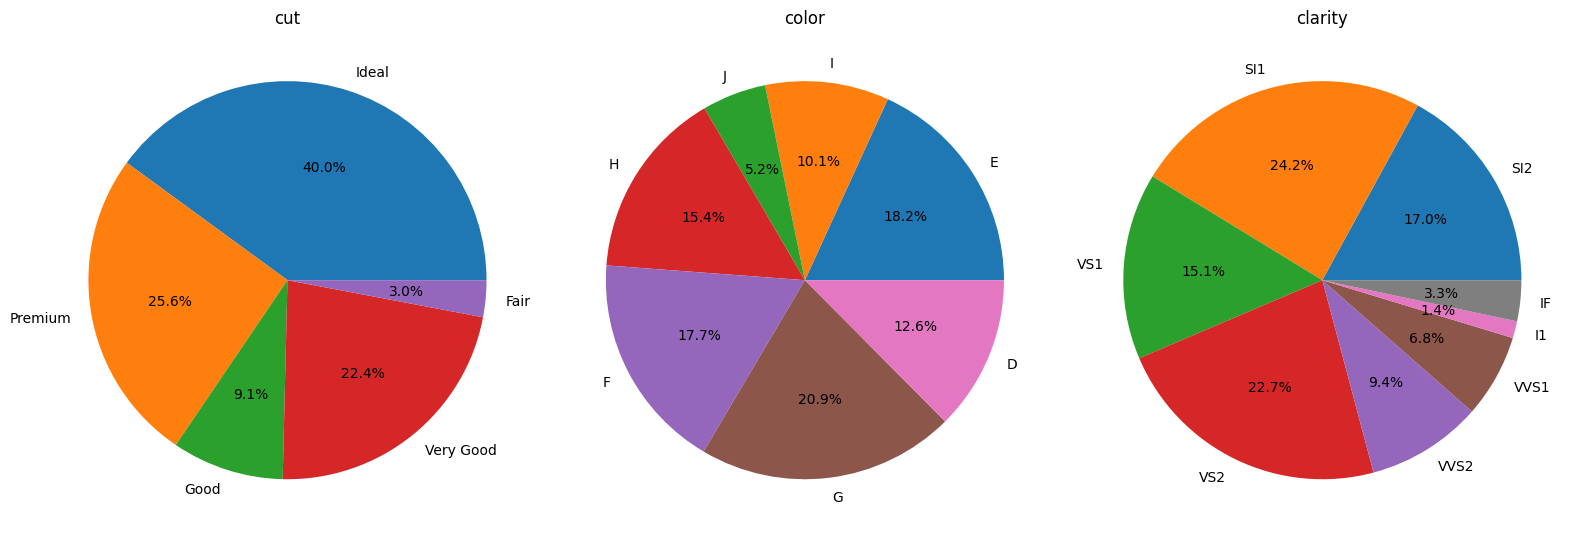

In [9]:
def count_items(column_name):
    item_count = {}
    for item in df[column_name]:
        if item in item_count:
            item_count[item] += 1
        else:
            item_count[item] = 1
    return item_count

fig, axs = plt.subplots(1, 3, figsize=(16, 16))
axs = axs.flatten()
col_counter = 0
for col in categorical_columns:
  count = count_items(col)
  axs[col_counter].pie(count.values(), labels=count.keys(), autopct='%1.1f%%')
  axs[col_counter].set_title(col)
  col_counter += 1

plt.tight_layout()
plt.show()

### Handling Missing Values

In [10]:
missing_values = df.isnull().sum()
print(missing_values)

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


### Categorical to Numerical Conversion

In [12]:


le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

### Target Feature

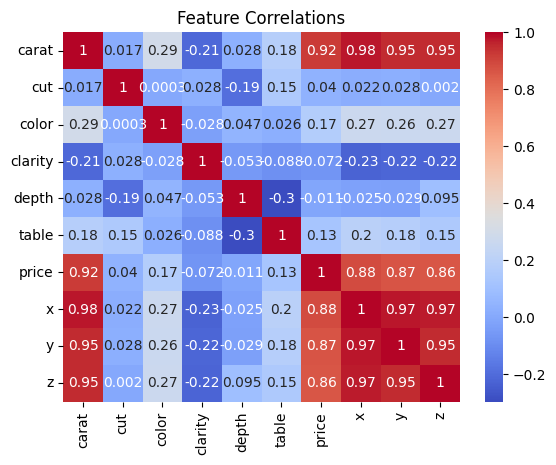

price      1.000000
carat      0.921591
x          0.884435
y          0.865421
z          0.861249
color      0.172511
table      0.127134
clarity    0.071535
cut        0.039860
depth      0.010647
Name: price, dtype: float64


In [13]:
# target = df['price']

correlations = df.corr(numeric_only=False)
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()

print(correlations['price'].abs().sort_values(ascending=False))

### Data Visualization

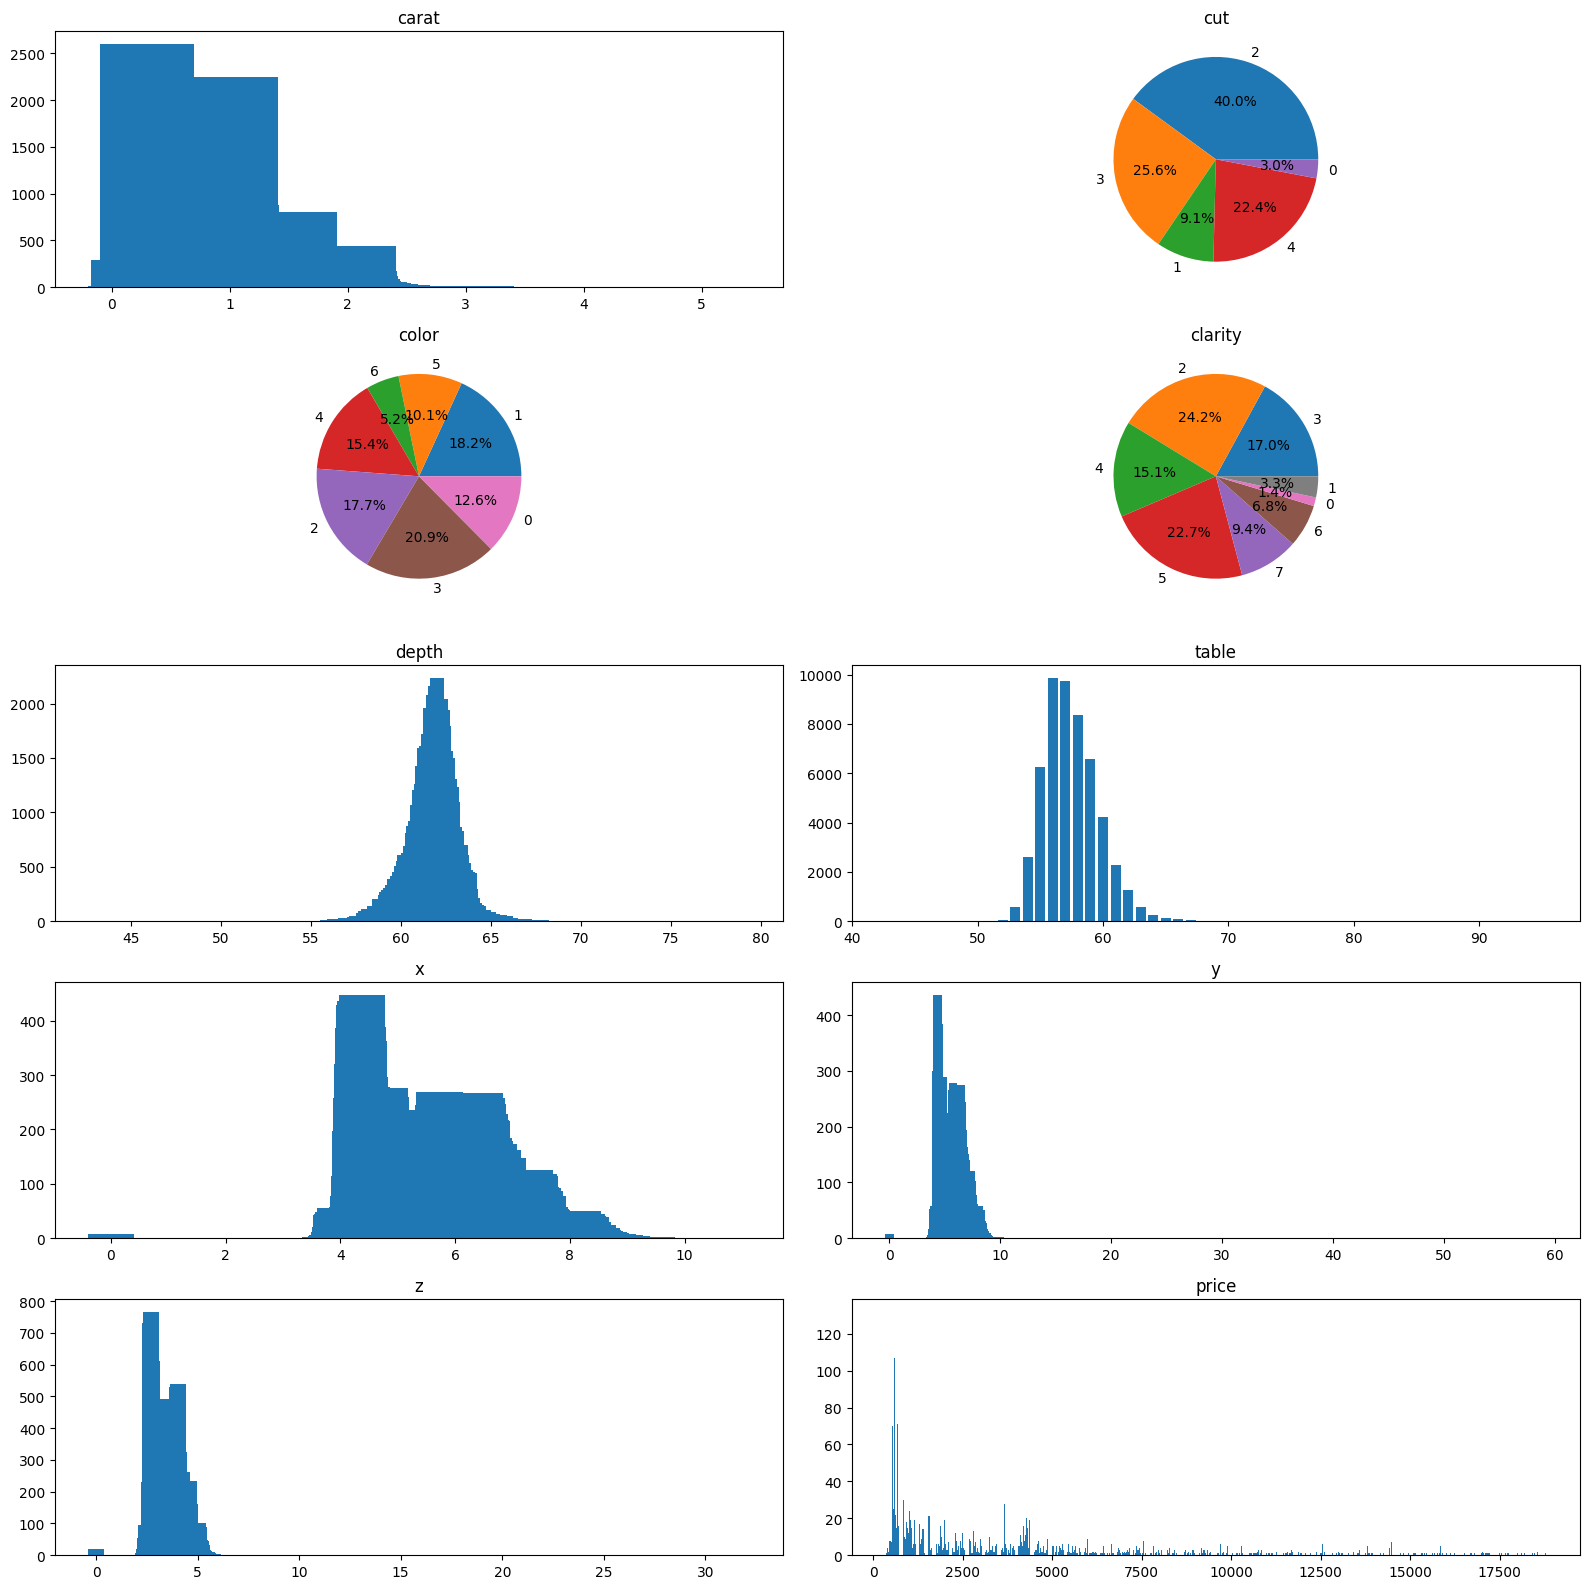

In [14]:


fig, axs = plt.subplots(5, 2, figsize=(16, 16))
axs = axs.flatten()
col_counter = 0
for col in cols:
    count = count_items(col)
    if col in numerical_columns:
        axs[col_counter].bar(count.keys(), count.values())
        axs[col_counter].set_title(col)
    elif col in categorical_columns:
        axs[col_counter].pie(count.values(), labels=count.keys(), autopct='%1.1f%%')
        axs[col_counter].set_title(col)
    col_counter += 1

plt.tight_layout()
plt.show()

### Data Splitting for Model Training

In [15]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Training set X shape:", X_train.shape)
print("Training set y shape:", y_train.shape)
print("Test set X shape:", X_test.shape)
print("Test set y shape:", y_test.shape)

Training set X shape: (40455, 9)
Training set y shape: (40455,)
Test set X shape: (13485, 9)
Test set y shape: (13485,)


In [16]:
df = pd.get_dummies(df, columns=categorical_columns)

## Learning Models

### Linear Regression

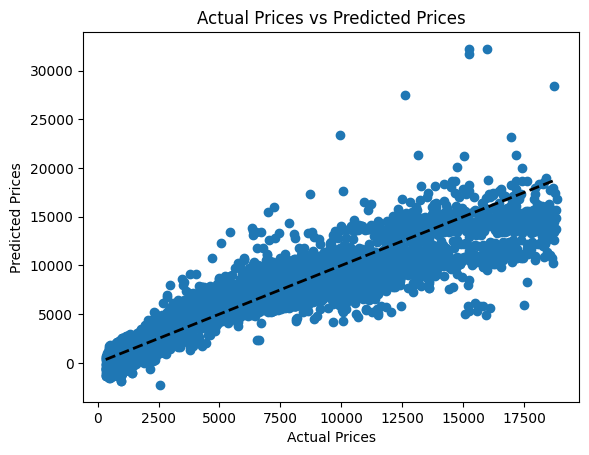

Training Set:
Mean Absolute Error: 864.621018860017
R2 Score: 0.8847607305539041
Test Set:
Mean Absolute Error: 857.809835587691
R2 Score: 0.8859756425494829


In [17]:
model_LinearRegression = LinearRegression()
model_LinearRegression.fit(X_train, y_train)

y_train_pred = model_LinearRegression.predict(X_train)
y_test_pred = model_LinearRegression.predict(X_test)

plt.scatter(y_test, y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

r2LinearTrain = r2_score(y_train, y_train_pred)
r2LinearTest = r2_score(y_test, y_test_pred)

print("Training Set:")
print("Mean Absolute Error:", mean_absolute_error(y_train, y_train_pred))
print("R2 Score:", r2LinearTrain)
print("Test Set:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_test_pred))
print("R2 Score:", r2LinearTest)

### Neural Network

In [18]:
X_train_temp, X_validation, y_train_temp, y_validaion = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [19]:
model_NeuralNetwork = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model_NeuralNetwork.compile(optimizer='adam', loss='mean_absolute_error')
model_NeuralNetwork.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 6

In [20]:
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
history = model_NeuralNetwork.fit(X_train_temp, y_train_temp, validation_data=(X_validation, y_validaion), epochs=50, batch_size=64, callbacks=[early_stopping])
# model_NeuralNetwork.save('trained_model.h5')

Epoch 1/50
506/506 [==============================] - 9s 4ms/step - loss: 2840.8958 - val_loss: 2437.4053
Epoch 2/50
506/506 [==============================] - 2s 4ms/step - loss: 1322.5209 - val_loss: 729.9833
Epoch 3/50
506/506 [==============================] - 3s 5ms/step - loss: 835.1775 - val_loss: 693.3945
Epoch 4/50
506/506 [==============================] - 3s 6ms/step - loss: 804.3060 - val_loss: 666.1439
Epoch 5/50
506/506 [==============================] - 3s 6ms/step - loss: 787.3422 - val_loss: 652.6630
Epoch 6/50
506/506 [==============================] - 2s 5ms/step - loss: 784.3859 - val_loss: 664.8793
Epoch 7/50
506/506 [==============================] - 2s 4ms/step - loss: 782.1603 - val_loss: 645.1365
Epoch 8/50
506/506 [==============================] - 2s 4ms/step - loss: 775.2803 - val_loss: 660.0460
Epoch 9/50
506/506 [==============================] - 2s 4ms/step - loss: 776.4187 - val_loss: 642.4724
Epoch 10/50
506/506 [==============================] - 2s 5ms

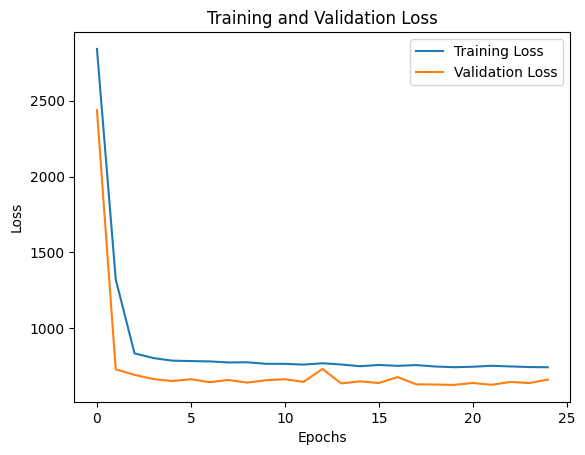

422/422 [==============================] - 1s 2ms/step - loss: 586.9325
Test Loss: 586.9324951171875
422/422 [==============================] - 1s 2ms/step


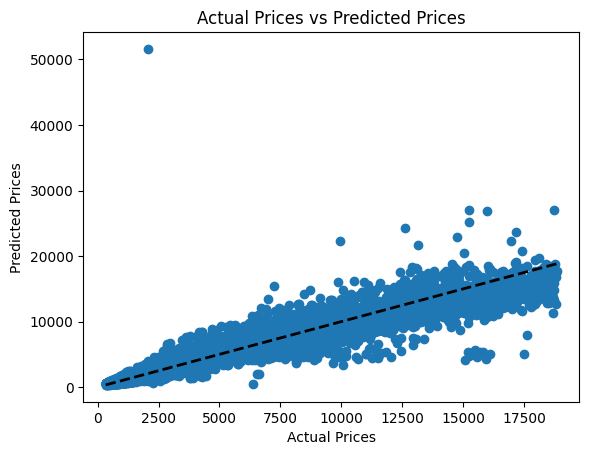

In [21]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

loss = model_NeuralNetwork.evaluate(X_test, y_test)
print("Test Loss:", loss)

y_pred = model_NeuralNetwork.predict(X_test)
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

### Random Forest

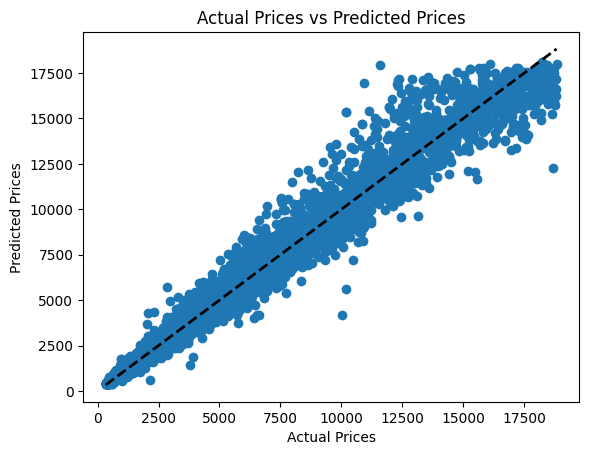

Training Set:
Mean Absolute Error: 101.13628807581614
R2 Score: 0.9973575319404089
Test Set:
Mean Absolute Error: 270.0428042404553
R2 Score: 0.9812206918786258


In [22]:
model_RandomForest = RandomForestRegressor()
model_RandomForest.fit(X_train, y_train)

y_train_pred = model_RandomForest.predict(X_train)
y_test_pred = model_RandomForest.predict(X_test)

plt.scatter(y_test, y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

print("Training Set:")
print("Mean Absolute Error:", mean_absolute_error(y_train, y_train_pred))
print("R2 Score:", r2_score(y_train, y_train_pred))
print("Test Set:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_test_pred))
print("R2 Score:", r2_score(y_test, y_test_pred))

## Parameter Tuning

### Neural Network

In [25]:
def model_neural_network(num_hiddenLayers, num_units, kernel_initializer, activation_function):
    model_nn = Sequential()
    model_nn.add(Dense(num_units, activation=activation_function, kernel_initializer=kernel_initializer, input_shape=(X_train.shape[1],)))
    model_nn.add(Dropout(0.2))
    for i in range(num_hiddenLayers):
        model_nn.add(Dense(num_units, activation=activation_function, kernel_initializer=kernel_initializer))
        model_nn.add(Dropout(0.2))
    Dense(1)
    model_nn.compile(optimizer='adam', loss='mean_absolute_error', metrics=['accuracy'])
    return model_nn

model_nn = KerasClassifier(build_fn=model_neural_network, epochs=5, batch_size=64)

<ipython-input-25-bb1639c8b414>:12: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_nn = KerasClassifier(build_fn=model_neural_network, epochs=5, batch_size=64)


In [26]:
param_grid_nn = {
    'num_hiddenLayers': [2, 3],
    'num_units': [32, 64],
    'kernel_initializer': ['zero', 'he_normal', 'he_uniform'],
    'activation_function': ['sigmoid', 'relu', 'tanh']
}

gridSearch_nn = GridSearchCV(estimator=model_nn, param_grid=param_grid_nn, cv=3, verbose=2)
grid_nn = gridSearch_nn.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Epoch 1/5
422/422 [==============================] - 3s 4ms/step - loss: 2700.5681 - accuracy: 1.4831e-04
Epoch 2/5
422/422 [==============================] - 2s 4ms/step - loss: 2700.5022 - accuracy: 1.4831e-04
Epoch 3/5
422/422 [==============================] - 2s 4ms/step - loss: 2700.4998 - accuracy: 7.4156e-05
Epoch 4/5
422/422 [==============================] - 2s 4ms/step - loss: 2700.4978 - accuracy: 7.4156e-05
Epoch 5/5
211/211 [==============================] - 1s 4ms/step - loss: 2681.1880 - accuracy: 7.4156e-05
[CV] END activation_function=sigmoid, kernel_initializer=zero, num_hiddenLayers=2, num_units=32; total time=  12.5s
Epoch 1/5
422/422 [==============================] - 3s 4ms/step - loss: 2670.7900 - accuracy: 1.1123e-04
Epoch 2/5
422/422 [==============================] - 2s 4ms/step - loss: 2670.7249 - accuracy: 3.7078e-05
Epoch 3/5
422/422 [==============================] - 2s 4ms/step - loss: 2670.72

In [27]:
table_nn = pd.DataFrame(grid_nn.cv_results_)
table_nn.to_csv('/content/drive/MyDrive/datasets/gridsearchNN.csv', index=False)

In [30]:
model_NeuralNetwork1 = Sequential([
    Dense(64, activation='relu', kernel_initializer='he_uniform', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu', kernel_initializer='he_uniform'),
    Dropout(0.2),
    Dense(64, activation='relu', kernel_initializer='he_uniform'),
    Dropout(0.2),
    Dense(64, activation='relu', kernel_initializer='he_uniform'),
    Dropout(0.2),
    Dense(1)
])

model_NeuralNetwork1.compile(optimizer='adam', loss='mean_absolute_error',  metrics=['accuracy'])
model_NeuralNetwork1.summary()

Model: "sequential_124"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_557 (Dense)           (None, 64)                640       
                                                                 
 dropout_433 (Dropout)       (None, 64)                0         
                                                                 
 dense_558 (Dense)           (None, 64)                4160      
                                                                 
 dropout_434 (Dropout)       (None, 64)                0         
                                                                 
 dense_559 (Dense)           (None, 64)                4160      
                                                                 
 dropout_435 (Dropout)       (None, 64)                0         
                                                                 
 dense_560 (Dense)           (None, 64)             

In [31]:
history = model_NeuralNetwork1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64, callbacks=[early_stopping])

Epoch 1/50
633/633 [==============================] - 7s 6ms/step - loss: 2056.4539 - accuracy: 0.0000e+00 - val_loss: 868.2396 - val_accuracy: 0.0000e+00
Epoch 2/50
633/633 [==============================] - 3s 5ms/step - loss: 1040.0463 - accuracy: 0.0000e+00 - val_loss: 816.4015 - val_accuracy: 0.0000e+00
Epoch 3/50
633/633 [==============================] - 3s 5ms/step - loss: 949.5886 - accuracy: 0.0000e+00 - val_loss: 699.6942 - val_accuracy: 0.0000e+00
Epoch 4/50
633/633 [==============================] - 4s 7ms/step - loss: 895.8976 - accuracy: 0.0000e+00 - val_loss: 706.8900 - val_accuracy: 0.0000e+00
Epoch 5/50
633/633 [==============================] - 4s 6ms/step - loss: 873.3055 - accuracy: 0.0000e+00 - val_loss: 839.3370 - val_accuracy: 0.0000e+00
Epoch 6/50
633/633 [==============================] - 3s 5ms/step - loss: 865.8108 - accuracy: 0.0000e+00 - val_loss: 817.5602 - val_accuracy: 0.0000e+00
Epoch 7/50
633/633 [==============================] - 3s 5ms/step - loss: 

422/422 [==============================] - 1s 3ms/step


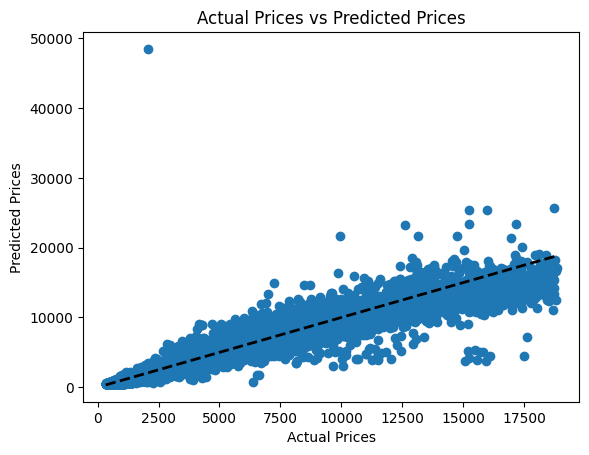

Training Set:
Mean Absolute Error: 663.9026339080098
R2 Score: 0.8993316877442932
Test Set:
Mean Absolute Error: 650.0516724040166
R2 Score: 0.9100507735310808


In [32]:
y_train_pred = model_NeuralNetwork1.predict(X_train)
y_test_pred = model_NeuralNetwork1.predict(X_test)

plt.scatter(y_test, y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

r2NNTrain = r2_score(y_train, y_train_pred)
r2NNTest = r2_score(y_test, y_test_pred)

print("Training Set:")
print("Mean Absolute Error:", mean_absolute_error(y_train, y_train_pred))
print("R2 Score:", r2NNTrain)
print("Test Set:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_test_pred))
print("R2 Score:", r2NNTest)

### Random Forest

In [33]:
model_RandomForestRegressor = RandomForestRegressor(random_state=42)
param_grid_RandomForest = {'n_estimators': [10, 50, 100, 150, 200]}

grid_search_rf = GridSearchCV(estimator=model_RandomForestRegressor, param_grid=param_grid_RandomForest, cv=5, verbose=5)
grid_rf = grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ...................n_estimators=10;, score=0.980 total time=   1.7s
[CV 2/5] END ...................n_estimators=10;, score=0.976 total time=   3.9s
[CV 3/5] END ...................n_estimators=10;, score=0.979 total time=   2.2s
[CV 4/5] END ...................n_estimators=10;, score=0.979 total time=   1.3s
[CV 5/5] END ...................n_estimators=10;, score=0.980 total time=   1.3s
[CV 1/5] END ...................n_estimators=50;, score=0.981 total time=   7.3s
[CV 2/5] END ...................n_estimators=50;, score=0.978 total time=   7.0s
[CV 3/5] END ...................n_estimators=50;, score=0.980 total time=   7.3s
[CV 4/5] END ...................n_estimators=50;, score=0.981 total time=   7.0s
[CV 5/5] END ...................n_estimators=50;, score=0.980 total time=   7.2s
[CV 1/5] END ..................n_estimators=100;, score=0.981 total time=  14.2s
[CV 2/5] END ..................n_estimators=100;,

In [34]:
table_rf = pd.DataFrame(grid_rf.cv_results_)
table_rf.to_csv('/content/drive/MyDrive/datasets/gridsearchRF.csv', index=False)

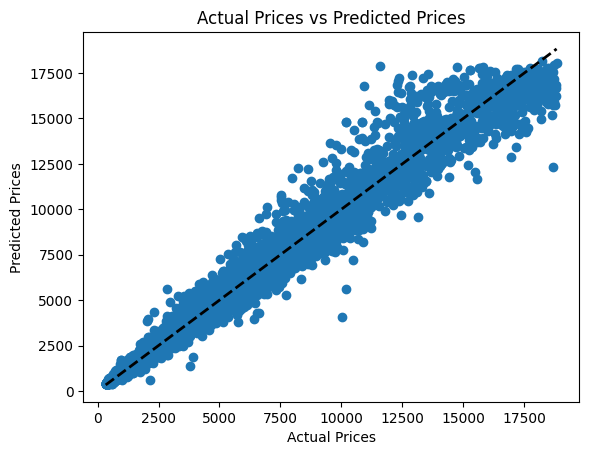

Training Set:
Mean Absolute Error: 101.33736141980214
R2 Score: 0.9972971516853494
Test Set:
Mean Absolute Error: 269.5401041633561
R2 Score: 0.9812791789194206


In [35]:
model_RandomForest = RandomForestRegressor(n_estimators = 100)
model_RandomForest.fit(X_train, y_train)

y_train_pred = model_RandomForest.predict(X_train)
y_test_pred = model_RandomForest.predict(X_test)

plt.scatter(y_test, y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

r2forestTrain = r2_score(y_train, y_train_pred)
r2forestTest = r2_score(y_test, y_test_pred)

print("Training Set:")
print("Mean Absolute Error:", mean_absolute_error(y_train, y_train_pred))
print("R2 Score:", r2forestTrain)
print("Test Set:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_test_pred))
print("R2 Score:", r2forestTest)

### Clustering

In [40]:
kmeans = KMeans(n_clusters=20, random_state=42)
cluster_labels = kmeans.fit_predict(X_train)

train_labels = kmeans.labels_
test_labels = kmeans.predict(X_test)

train_accuracy = accuracy_score(y_train, train_labels)
test_accuracy = accuracy_score(y_test, test_labels)
print("Test accuracy:", test_accuracy)
print("Training accuracy:", train_accuracy)
print("R2 Score:", abs(r2_score(y_train, train_labels)))
print("R2 Score:", abs(r2_score(y_test, test_labels)))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Test accuracy: 0.0
Training accuracy: 0.0
R2 Score: 0.9677060244854276
R2 Score: 0.965142039749181


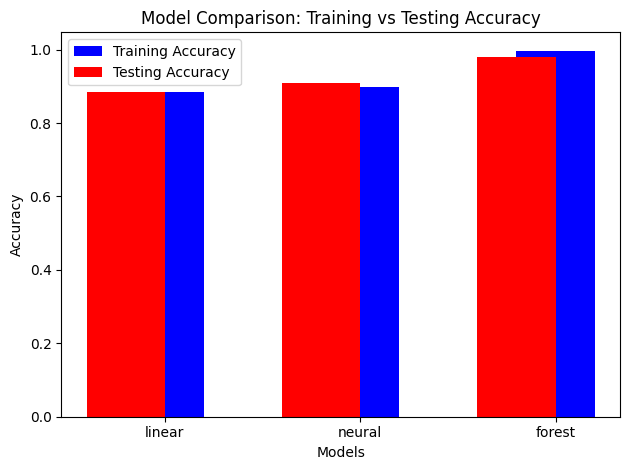

In [41]:
#compare
models = ['linear', 'neural', 'forest']
trains = [r2LinearTrain, r2NNTrain, r2forestTrain]
tests = [r2LinearTest, r2NNTest, r2forestTest]

plt.bar(models, trains, color='b', width=0.4, align='center', label='Training Accuracy')
plt.bar(models, tests, color='r', width=-0.4, align='edge', label='Testing Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Training vs Testing Accuracy')
plt.legend()
plt.tight_layout()
plt.show()